In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
import os
os.getcwd()

'C:\\Users\\dell'

In [3]:
#Work on time series dataset Airpassengers.csv
df=pd.read_csv("Airpassengers.csv")

In [7]:
#To show first 5 records 
df.head()

Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

In [8]:
#to check datatypes 
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [9]:
#To convert Month column into date on the time of load of dataset 
df=pd.read_csv("Airpassengers.csv",parse_dates=['Month'])

In [10]:
df.head()

Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121

In [11]:
#To check datatype
df.dtypes  #ns means neno second :unit of time

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [12]:
df.head()

Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121

In [13]:
#It is recommended that we make our time series reference as the index 
df=pd.read_csv("Airpassengers.csv",parse_dates=['Month'],
              index_col='Month')

In [14]:
df.head()

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

In [15]:
df.shape

(144, 1)

In [16]:
#To Access record from given dataframe df from 1st-april-1951 to 
#1st march-1952 
df['1951-04-01':'1952-03-01'] #use slicing 
#step =1 means increment month one by one 

#Passengers
Month                  
1951-04-01          163
1951-05-01          172
1951-06-01          178
1951-07-01          199
1951-08-01          199
1951-09-01          184
1951-10-01          162
1951-11-01          146
1951-12-01          166
1952-01-01          171
1952-02-01          180
1952-03-01          193

In [17]:
#We can check values means no. of passengers corresponding to a 
#specific time period then use loc
#suppose we want to access no. of passengers from dataframe whose 
#time period 1-may-1960
df.loc['1960-05-01']  #yyyy-mm-dd in dataset

#Passengers    472
Name: 1960-05-01 00:00:00, dtype: int64

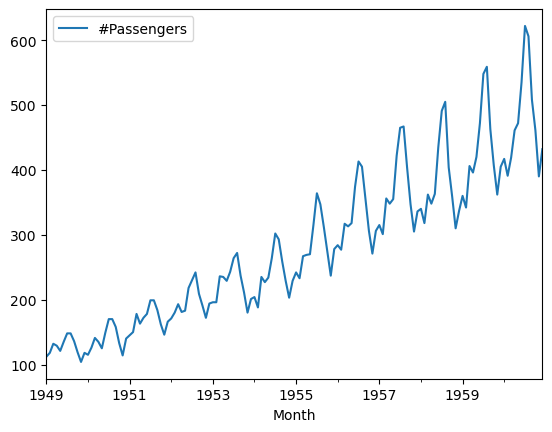

In [18]:
#Plot time series 
df.plot()
plt.show()

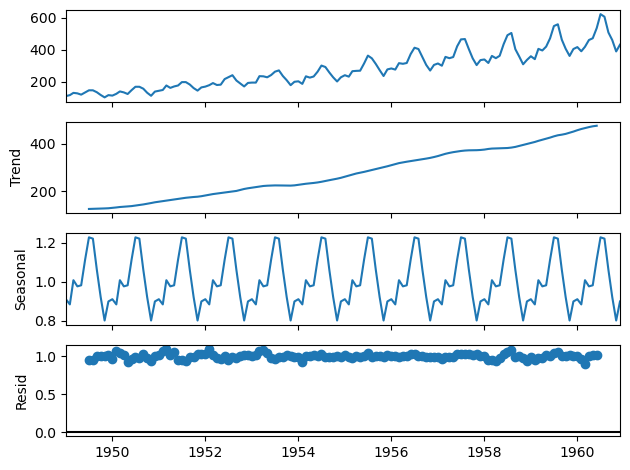

In [19]:
#Hera Seasonality is not constant but trend are ocurring then use
#Multiplication model
#Decompose the time series data with the help of Multiplication model
#use inbuilt method seasonal_decompose() which define in 
#inbuilt library statsmodels.tsa.seasonal 
from statsmodels.tsa.seasonal import seasonal_decompose
df1=seasonal_decompose(df,model="multiplicative")
df1.plot()
plt.show()

In [21]:
df2=df.copy()  #or df2=df

In [22]:
df2.head()

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

In [23]:
#apply log of #Passengers column
df2['#Passengers']=np.log(df2)
df2

#Passengers
Month                  
1949-01-01     4.718499
1949-02-01     4.770685
1949-03-01     4.882802
1949-04-01     4.859812
1949-05-01     4.795791
...                 ...
1960-08-01     6.406880
1960-09-01     6.230481
1960-10-01     6.133398
1960-11-01     5.966147
1960-12-01     6.068426

[144 rows x 1 columns]

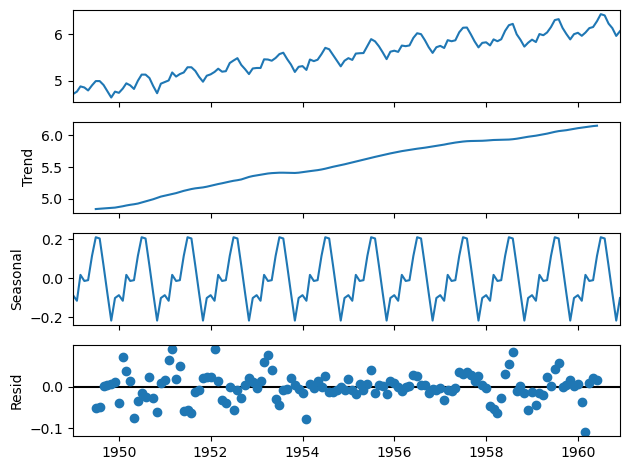

In [24]:
df3=seasonal_decompose(df2,model="additive")
df3.plot()
plt.show()

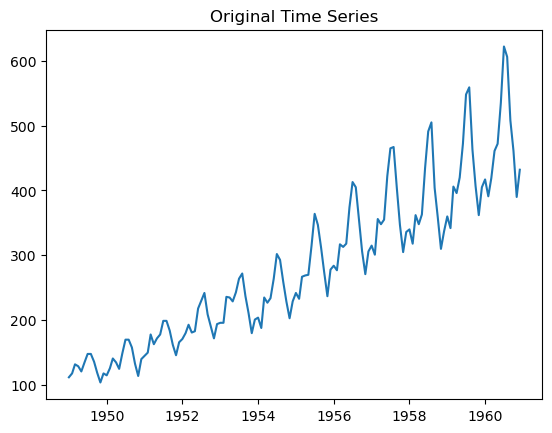

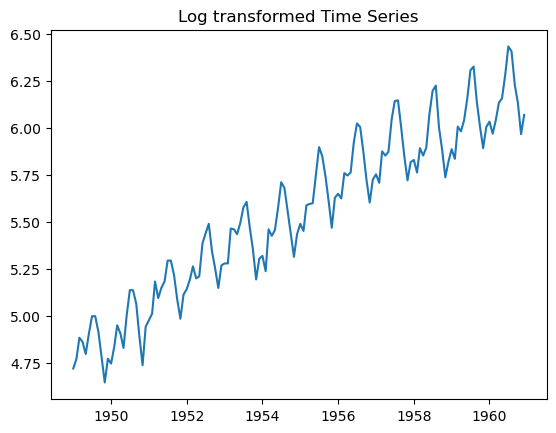

In [32]:

plt.title("Original Time Series")
plt.plot(df)
plt.show()

plt.title("Log transformed Time Series")
plt.plot(df2)
plt.show()